In [3]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from prepare_data import clean_data

In [4]:
# Run the query
query = "SELECT * FROM xdr_data;"  # Replace with actual table name
df = load_data_using_sqlalchemy(query)

if df is not None:
    print("Successfully loaded the data")
    display(df.head())
else:
    print("Failed to load data.")

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:

print("\nDataFrame shape:", df.shape)

print("\nColumn names:")
print(df.columns)
print("\nData types of columns:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

print("\nMissing values count:")
print(df.isnull().sum())


DataFrame shape: (150001, 55)

Column names:
Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
   

In [6]:
    # Clean the data
    df_cleaned = clean_data(df)

    # Display the cleaned data
    display(df_cleaned.head())

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,92261.223185,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,92261.223185,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,92261.223185,2.082015e+14,3.365762e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,92261.223185,2.082014e+14,3.365762e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,92261.223185,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Task 1 - User Overview Analysis

In [7]:
# Top 10 handsets used by the customers
top_10_handsets = df_cleaned['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_10_handsets)

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [8]:
# Top 3 handset manufacturers
top_3_manufacturers = df_cleaned['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:\n", top_3_manufacturers)

Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [9]:
# Top 5 handsets for each of the top 3 manufacturers
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df_cleaned[df_cleaned['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:\n", top_5_handsets)


Top 5 handsets for Apple:
 Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
 Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


Task 1.1 - Users’ Behavior on Applications

In [11]:
# Aggregate per user
user_agg = df_cleaned.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  
    'Dur. (ms)': 'sum',  
    'Total DL (Bytes)': 'sum', 
    'Total UL (Bytes)': 'sum', 
})

user_agg['Total Data Volume (Bytes)'] = user_agg['Total DL (Bytes)'] + user_agg['Total UL (Bytes)']

user_agg = user_agg.rename(columns={'Bearer Id': 'Num of Sessions', 'Dur. (ms)': 'Total Duration (ms)'})
print(user_agg.head())


               Num of Sessions  Total Duration (ms)  Total DL (Bytes)  \
MSISDN/Number                                                           
3.360171e+10                 1              38503.0      2.934050e+08   
3.360171e+10                 1              52478.0      8.621012e+08   
3.360171e+10                 2             120298.0      1.498037e+09   
3.360171e+10                 1             176022.0      1.333844e+08   
3.360172e+10                 1             127918.0      3.060978e+08   

               Total UL (Bytes)  Total Data Volume (Bytes)  
MSISDN/Number                                               
3.360171e+10         46211970.0               3.396170e+08  
3.360171e+10         38509721.0               9.006109e+08  
3.360171e+10         89299844.0               1.587337e+09  
3.360171e+10         44946263.0               1.783307e+08  
3.360172e+10         28593661.0               3.346914e+08  


Task 1.2 - Exploratory Data Analysis (EDA)

In [12]:
print(df.dtypes)

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                category
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [14]:
import pandas as pd
user_agg['Duration Decile'] = pd.qcut(user_agg['Total Duration (ms)'], 5, labels=False) + 1

decile_agg = user_agg.groupby('Duration Decile').agg({
    'Total Data Volume (Bytes)': 'sum'
})
print(decile_agg)


                 Total Data Volume (Bytes)
Duration Decile                           
1                             9.710935e+12
2                             1.075478e+13
3                             9.406116e+12
4                             1.135792e+13
5                             3.313521e+13


In [15]:
# Basic statistics
basic_stats = user_agg.describe()
print(basic_stats)

mean_duration = user_agg['Total Duration (ms)'].mean()
median_duration = user_agg['Total Duration (ms)'].median()

print(f"Mean Duration: {mean_duration}, Median Duration: {median_duration}")


       Num of Sessions  Total Duration (ms)  Total DL (Bytes)  \
count     90037.000000         9.003700e+04      9.003700e+04   
mean          1.665993         1.537065e+05      7.574327e+08   
std          82.455646         7.605106e+06      3.729289e+10   
min           1.000000         7.146000e+03      9.046209e+06   
25%           1.000000         7.006900e+04      3.148954e+08   
50%           1.000000         9.675900e+04      5.709104e+08   
75%           2.000000         1.691750e+05      8.069435e+08   
max       24742.000000         2.281924e+09      1.118994e+13   

       Total UL (Bytes)  Total Data Volume (Bytes)  Duration Decile  
count      9.003700e+04               9.003700e+04     90037.000000  
mean       6.850515e+07               8.259379e+08         2.983596  
std        3.391822e+09               4.068459e+10         1.419922  
min        9.512288e+06               3.324901e+07         1.000000  
25%        3.644017e+07               3.585871e+08         2.000

In [16]:
# Dispersion parameters for each quantitative variable
dispersion = user_agg[['Num of Sessions', 'Total Duration (ms)', 'Total Data Volume (Bytes)']].agg(['mean', 'std', 'var', 'skew'])
print(dispersion)


      Num of Sessions  Total Duration (ms)  Total Data Volume (Bytes)
mean         1.665993         1.537065e+05               8.259379e+08
std         82.455646         7.605106e+06               4.068459e+10
var       6798.933476         5.783763e+13               1.655236e+21
skew       300.019129         2.999810e+02               2.999965e+02


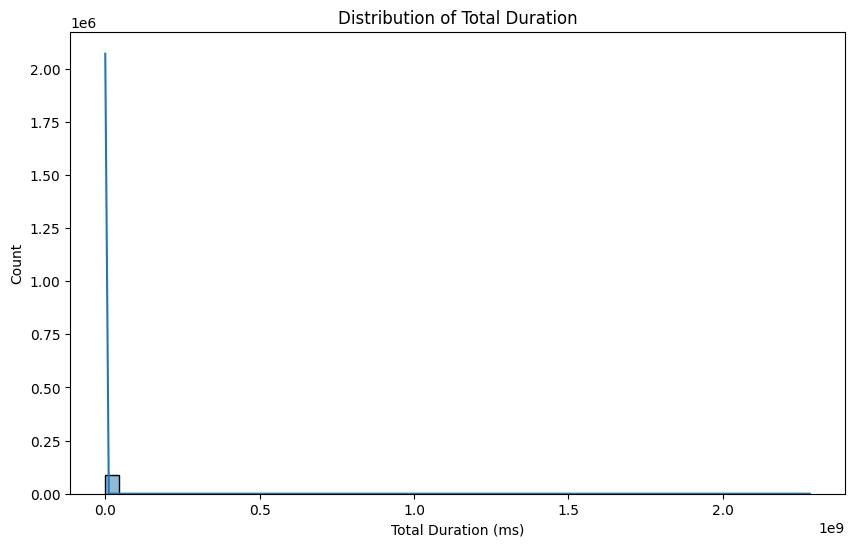

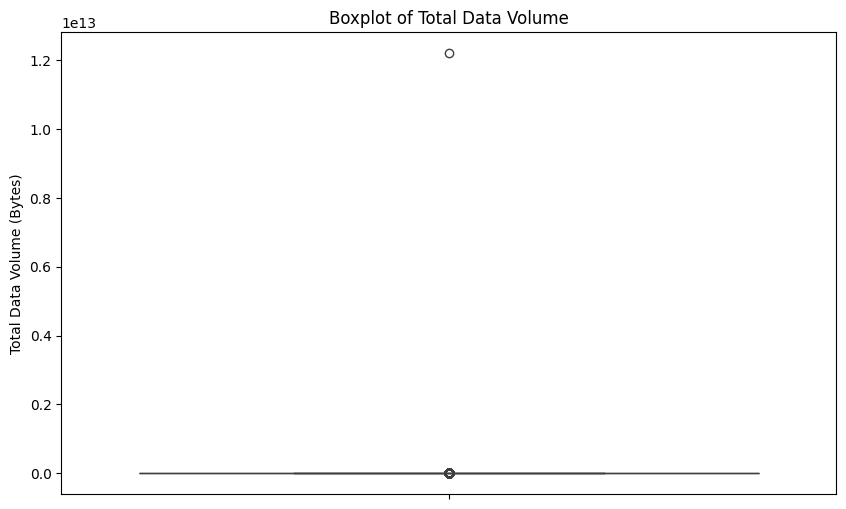

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Total Duration
plt.figure(figsize=(10,6))
sns.histplot(user_agg['Total Duration (ms)'], bins=50, kde=True)
plt.title('Distribution of Total Duration')
plt.show()

# Boxplot for Total Data Volume
plt.figure(figsize=(10,6))
sns.boxplot(user_agg['Total Data Volume (Bytes)'])
plt.title('Boxplot of Total Data Volume')
plt.show()
